In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

data_dir = '../data'
for file in os.listdir(data_dir):
    if os.path.isdir(file):
        continue
    print(file)

plot_ndvi.pkl
weather_25_clipped.pkl
df_savi.pkl
plot_elev_features.pkl
soil
df_ndwi.pkl
df_ndvi_rendvi.pkl
df_evi.pkl
ndvi_raw_2025.pkl
DEM
plot_features.pkl
df_mcari2.pkl
ndvi_2025.pkl
df_2025.pkl
PRISM
df.pkl
plot_ndvi_filtered.pkl
plot_ndvi_filtered_2025.pkl
polygons
ndvi
plot_ndvi_2025.pkl


In [2]:
df_path = os.path.join(data_dir, 'df.pkl')
df = pd.read_pickle(df_path)

df

,plot_id,curve_mean,curve_min,curve_max,pro_curve_mean,pro_curve_min,pro_curve_max,plan_curve_mean,plan_curve_min,plan_curve_max,...,cec7_r,om_r,ph1to1h2o_r,ec_r,profile_depth,max_depth,frag3to10_r,fraggt10_r,dbovendry_r,caco3_r
0,0,0.000489,-0.009361,0.013225,0.000620,-0.010633,0.013191,0.000489,-0.009361,0.013225,...,3.500000,0.366279,7.0,0.000000,43.0,43.0,0.0,0.0,1.494419,0.000000
1,0,0.000489,-0.009361,0.013225,0.000620,-0.010633,0.013191,0.000489,-0.009361,0.013225,...,3.500000,0.366279,7.0,0.000000,43.0,43.0,0.0,0.0,1.494419,0.000000
2,0,0.000489,-0.009361,0.013225,0.000620,-0.010633,0.013191,0.000489,-0.009361,0.013225,...,3.500000,0.366279,7.0,0.000000,43.0,43.0,0.0,0.0,1.494419,0.000000
3,0,0.000489,-0.009361,0.013225,0.000620,-0.010633,0.013191,0.000489,-0.009361,0.013225,...,3.500000,0.366279,7.0,0.000000,43.0,43.0,0.0,0.0,1.494419,0.000000
4,0,0.000489,-0.009361,0.013225,0.000620,-0.010633,0.013191,0.000489,-0.009361,0.013225,...,3.500000,0.366279,7.0,0.000000,43.0,43.0,0.0,0.0,1.494419,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32377,3597,-0.000758,-0.019660,0.016977,0.001952,-0.012836,0.017013,-0.000758,-0.019660,0.016977,...,3.651316,0.325658,7.9,0.848684,152.0,152.0,0.0,0.0,1.662434,1.697368
32378,3597,-0.000758,-0.019660,0.016977,0.001952,-0.012836,0.017013,-0.000758,-0.019660,0.016977,...,3.651316,0.325658,7.9,0.848684,152.0,152.0,0.0,0.0,1.662434,1.697368
32379,3597,-0.000758,-0.019660,0.016977,0.001952,-0.012836,0.017013,-0.000758,-0.019660,0.016977,...,3.651316,0.325658,7.9,0.848684,152.0,152.0,0.0,0.0,1.662434,1.697368
32380,3597,-0.000758,-0.019660,0.016977,0.001952,-0.012836,0.017013,-0.000758,-0.019660,0.016977,...,3.651316,0.325658,7.9,0.848684,152.0,152.0,0.0,0.0,1.662434,1.697368


In [3]:
# --- Identify leakage columns ---
leakage_cols = [col for col in df.columns if any(
    col.endswith(f"_{m}") for m in range(36,45)
)]
leakage_cols.extend([col for col in df.columns if col.endswith('length')])
leakage_cols.extend([col for col in df.columns if 'mcari2' in col or 'rendvi' in col])
leakage_cols.extend(['ndvi_mean','ndvi_cov','ndvi_std'])

In [4]:
# --- Define target and features ---
target_cols = [
    'ndvi_smooth_mean_36',
    'ndvi_smooth_mean_37',
    'ndvi_smooth_mean_38',
    'ndvi_smooth_mean_39',
    'ndvi_smooth_mean_40',
    'ndvi_smooth_mean_41',
    'ndvi_smooth_mean_42',
    'ndvi_smooth_mean_43',
    # 'ndvi_smooth_mean_44',
    
#     'rendvi_smooth_mean_36',
#     'rendvi_smooth_mean_37',
#     'rendvi_smooth_mean_38',
#     'rendvi_smooth_mean_39',
#     'rendvi_smooth_mean_40',
#     'rendvi_smooth_mean_41',
#     'rendvi_smooth_mean_42',
#     'rendvi_smooth_mean_43',
#     'rendvi_smooth_mean_44',
]
X = df.drop(columns=leakage_cols + ['plot_id', 'year'] + target_cols)
y = df[target_cols]

In [5]:
from sklearn.model_selection import train_test_split

X_test, X_hold, y_test, y_hold = train_test_split(
    X, y, test_size = 0.8, random_state = 42
)

X_train, X_tune, y_train, y_tune = train_test_split(
    X_hold, y_hold, test_size = 0.25, random_state = 42
)

print(X_train.shape)
print(X_tune.shape)
print(X_test.shape)

print(y_train.shape)
print(y_tune.shape)
print(y_test.shape)

(19429, 156)
(6477, 156)
(6476, 156)
(19429, 8)
(6477, 8)
(6476, 8)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)
from sklearn.linear_model import Ridge, Lasso, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from xgboost import XGBRegressor

In [8]:
base_models = [
    ('rf', RandomForestRegressor(
        n_estimators=200, max_depth=12, random_state=8274, n_jobs=-1
    )),
    ('et', ExtraTreesRegressor(
        n_estimators=300, max_depth=12, random_state=836409, n_jobs=-1
    )),
    ('gb', GradientBoostingRegressor(
        n_estimators=150, learning_rate=0.05, max_depth=8, random_state=13425
    )),
    ('xgb', XGBRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=6,
        subsample=0.5, colsample_bytree=0.5, random_state=4111112, n_jobs=-1
    )),
    ('knn', KNeighborsRegressor(n_neighbors=8, weights='distance', n_jobs=-1))
]

In [9]:
meta_model = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],
    alphas=np.logspace(-2, 1, 10),  
    cv=5,
    max_iter=20000,
    n_jobs=-1
)

In [10]:
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

In [11]:
multi_output_model = MultiOutputRegressor(stacked_model, n_jobs=-1)

In [12]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('regressor', TransformedTargetRegressor(
        regressor=multi_output_model,
        transformer=StandardScaler()  
    ))
])

In [13]:
model_path = 'models/tree_ensemble.pkl'
if not os.path.isfile(model_path):
    model_pipeline.fit(X_train, y_train)
    joblib.dump(model_pipeline, model_path)
else:
    model_pipeline = joblib.load(model_path)

In [26]:
y_pred_tune = model_pipeline.predict(X_tune)
y_pred_tune.shape

(6477, 8)

In [27]:
y_pred_train = model_pipeline.predict(X_train)
y_pred_train.shape

(19429, 8)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score


print("Tune Decision Tree R2:", r2_score(y_tune, y_pred_tune))
print("Tune Decision Tree RMSE:", mean_squared_error(y_tune, y_pred_tune))



print("train Decision Tree R2:", r2_score(y_train, y_pred_train))
print("train Decision Tree RMSE:", mean_squared_error(y_train, y_pred_train))





Tune Decision Tree R2: 0.9667724039867406
Tune Decision Tree RMSE: 0.00033153693914989344
train Decision Tree R2: 0.9915739094451813
train Decision Tree RMSE: 8.434417718772473e-05


In [16]:
y_true = y_tune.to_numpy()

In [17]:
import matplotlib.cm as cm


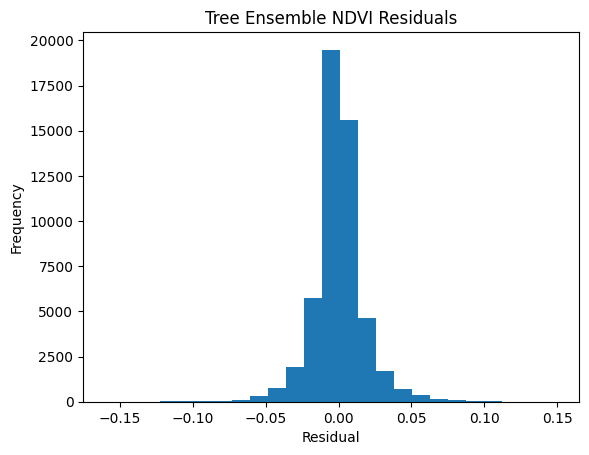

In [18]:
plt.hist(y_pred.flatten() - y_true.flatten(), bins = 25)
plt.title('Tree Ensemble NDVI Residuals')
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.savefig('regression_resid_hist.png')
plt.show()

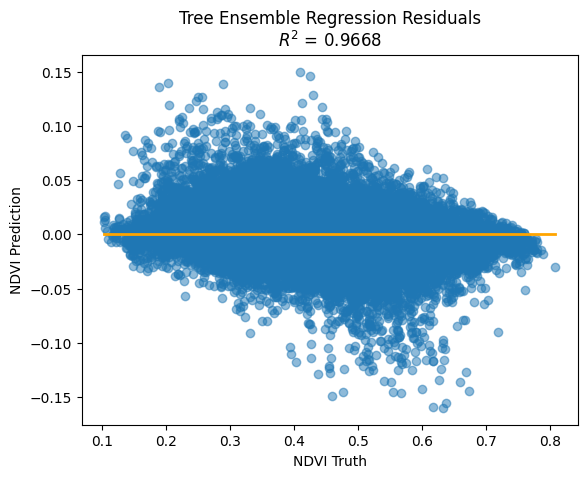

In [19]:
plt.scatter(y_true.flatten(), y_pred.flatten()- y_true.flatten(), alpha = 0.5)
plt.plot(
    
    [y_true.flatten().min(),y_true.flatten().max()],
    [0,0],
    c = 'orange',
    linewidth = 2,
)

plt.xlabel('NDVI Truth')
plt.ylabel('NDVI Prediction')
plt.title(f'Tree Ensemble Regression Residuals\n$R^2$ = {np.round(r2_score(y_tune, y_pred), 4)}')
plt.savefig('regression_resid.png')

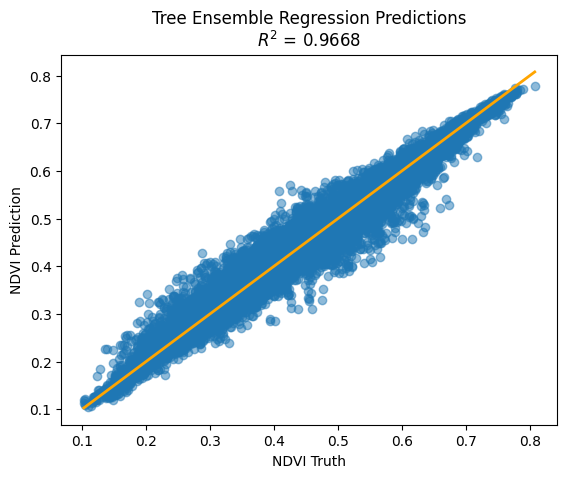

In [20]:
plt.scatter(y_true.flatten(), y_pred.flatten(), alpha = 0.5)
plt.plot(
    [y_true.flatten().min(),y_true.flatten().max()],
    [y_true.flatten().min(),y_true.flatten().max()],
    c = 'orange',
    linewidth = 2,
)

plt.xlabel('NDVI Truth')
plt.ylabel('NDVI Prediction')
plt.title(f'Tree Ensemble Regression Predictions\n$R^2$ = {np.round(r2_score(y_tune, y_pred), 4)}')
plt.savefig('regression_results.png')

In [21]:
weeks = range(36, 44)  # NDVI weeks
n_weeks = len(weeks)

In [22]:
cmap = cm.get_cmap('coolwarm_r', n_weeks)
norm = plt.Normalize(vmin=0, vmax=n_weeks - 1)

/tmp/ipykernel_12024/2811443568.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm_r', n_weeks)


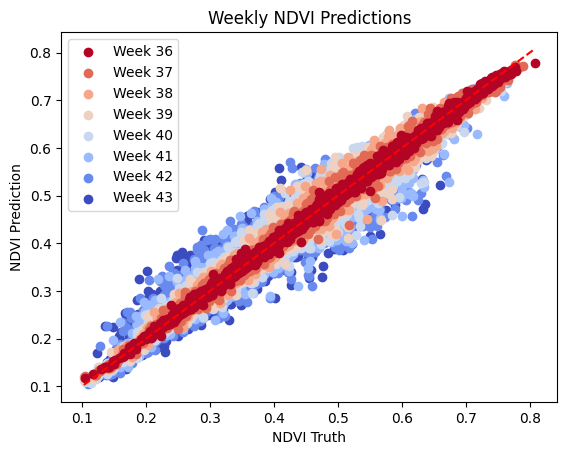

In [23]:
for i, week in reversed(list(enumerate(weeks))):
    # print(week)
    plt.scatter(
        y_true[:,i],
        y_pred[:,i], 
        label = f'Week {36 + i}', 
        alpha = 1,
        color = cmap(norm(i))
    )
    # plt.show()
    
plt.plot(
    (y_true.min().min(), y_true.max().max()),
    (y_true.min().min(), y_true.max().max()),
    '--r'
)
handles, labels = plt.gca().get_legend_handles_labels()

# Reverse them so Week 36, 37, ... are ascending again
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.title('Weekly NDVI Predictions')
plt.xlabel('NDVI Truth')
plt.ylabel('NDVI Prediction')
plt.savefig('../img/weekly_preds.png')

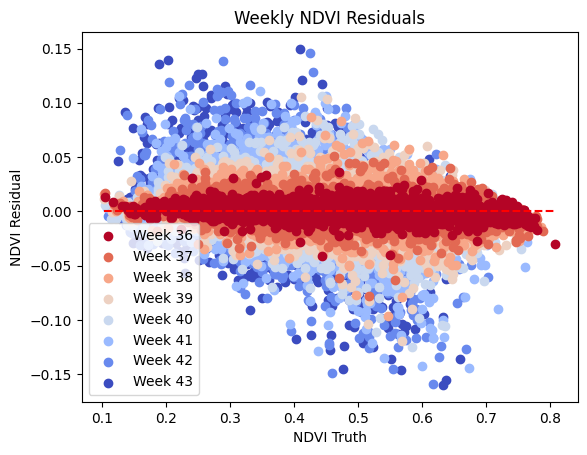

In [24]:
for i, week in reversed(list(enumerate(weeks))):
    # print(week)
    plt.scatter(
        y_true[:,i],
        y_pred[:,i] - y_true[:,i], 
        label = f'Week {36 + i}', 
        alpha = 1,
        color = cmap(norm(i))
    )
    # plt.show()
    
plt.plot(
    (y_true.min().min(), y_true.max().max()),
    (0, 0),
    '--r'
)
handles, labels = plt.gca().get_legend_handles_labels()

# Reverse them so Week 36, 37, ... are ascending again
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.title('Weekly NDVI Residuals')
plt.xlabel('NDVI Truth')
plt.ylabel('NDVI Residual')
plt.savefig('../img/weekly_preds_resid.png')

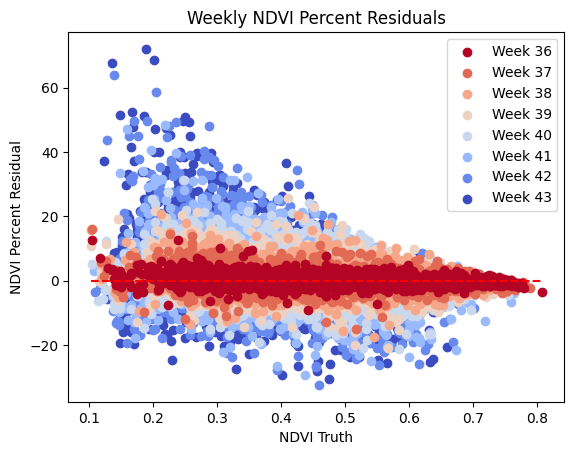

In [25]:
for i, week in reversed(list(enumerate(weeks))):
    # print(week)
    plt.scatter(
        y_true[:,i],
        (y_pred[:,i] - y_true[:,i]) / y_true[:,i] * 100, 
        label = f'Week {36 + i}', 
        alpha = 1,
        color = cmap(norm(i))
    )
    # plt.show()
    
plt.plot(
    (y_true.min().min(), y_true.max().max()),
    (0, 0),
    '--r'
)
handles, labels = plt.gca().get_legend_handles_labels()

# Reverse them so Week 36, 37, ... are ascending again
handles = handles[::-1]
labels = labels[::-1]

plt.legend(handles, labels)
plt.title('Weekly NDVI Percent Residuals')
plt.xlabel('NDVI Truth')
plt.ylabel('NDVI Percent Residual')
plt.savefig('../img/weekly_pct_preds_resid.png')